In [230]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [231]:
## Paths to data tables ##

# Infant mortality 
infant_mortality = "Resources/infant_mortality.csv"

# Maternal mortality
maternal_mortality = "Resources/maternal_mortality.csv"

# Life expectancy
life_expectancy = "Resources/life_expectancy.csv"

# Avoidable mortality
avoidable_mortality = "Resources/avoidable_mortality.csv"

# Heart disease
heart_disease_mortality = "Resources/heart_disease_mortality.csv"

# Health expenditure and financing
expenditure_financing = "Resources/expenditure_financing.csv"

# Percent insured
percent_insured = "Resources/percent_insured.csv"

# Health expenditure by financing scheme
expenditure_by_scheme = "Resources/expenditure_by_scheme.csv"

# Percentage GDP
percent_gdp = "Resources/percent_gdp.csv"


In [232]:
# Read in files using Pandas
life_expectancy_df = pd.read_csv(life_expectancy)
avoidable_mortality_df = pd.read_csv(avoidable_mortality)
infant_mortality_df = pd.read_csv(infant_mortality)
maternal_mortality_df = pd.read_csv(maternal_mortality)
heart_disease_mortality_df = pd.read_csv(heart_disease_mortality)
expenditure_financing_df = pd.read_csv(expenditure_financing)
percent_insured_df = pd.read_csv(percent_insured)


expenditure_by_scheme_df = pd.read_csv(expenditure_by_scheme)
percent_gdp_df = pd.read_csv(percent_gdp)


FileNotFoundError: [Errno 2] No such file or directory: 'Resources/life_expectancy.csv'

In [ ]:
#### Reorganize and rename each data set's columns for purpose of merge and readability ###

# Life expectancy 

life_expectancy_df = life_expectancy_df[["Country", "Year", "Value"]]
life_expectancy_df = life_expectancy_df.rename(columns = {"Value": "Life Expectancy (Years)"})

# Avoidable mortality
avoidable_mortality_df = avoidable_mortality_df[["Country", "Year", "Value"]]
avoidable_mortality_df = avoidable_mortality_df.rename(columns = {"Value": "Avoidable Deaths Per 100,000 Population"})

# Infant mortality 
infant_mortality_df = infant_mortality_df[["Country", "Year", "Value"]]
infant_mortality_df = infant_mortality_df.rename(columns = {"Value": "Infant Mortality (Deaths per 1,000 Live Births)"})

# Maternal mortality
maternal_mortality_df = maternal_mortality_df[["Country", "Year", "Value"]]
maternal_mortality_df = maternal_mortality_df.rename(columns = {"Value": "Maternal Mortality (Deaths per 100,000 Live Births)"})

# Heart disease mortality
heart_disease_mortality_df = heart_disease_mortality_df[["Country", "Year", "Value"]]
heart_disease_mortality_df = heart_disease_mortality_df.rename(columns = {"Value": "Death from Heart Disease per 100,000 Population"})

# Health expenditure per capita
expenditure_financing_df = expenditure_financing_df[["Country", "Year", "Value"]]
expenditure_financing_df = expenditure_financing_df.rename(columns = {"Value": "Health Expenditure Per Capita, Current Prices, Current PPP"})

# Percent population insured
percent_insured_df = percent_insured_df[["Country", "Year", "Value"]]
percent_insured_df = percent_insured_df.rename(columns = {"Value": "Total Percent of Population with Health Insurance"})


heart_disease_mortality_df.head()

,Country,Year,"Death from Heart Disease per 100,000 Population"
0,Australia,2018,175.9
1,Australia,2019,176.4
2,Australia,2020,158.6
3,Australia,2021,164.5
4,Austria,2018,306.5


In [ ]:
## Merge above data tables into one large table
merge1 = pd.merge(life_expectancy_df, avoidable_mortality_df, on=["Country", "Year"])
merge2 =pd.merge(merge1, infant_mortality_df, on=["Country", "Year"])
merge3 =pd.merge(merge2, maternal_mortality_df, on=["Country", "Year"])
merge4 =pd.merge(merge3, heart_disease_mortality_df, on=["Country", "Year"])
merge5 =pd.merge(merge4, expenditure_financing_df, on=["Country", "Year"])
merge6 =pd.merge(merge5, percent_insured_df, on=["Country", "Year"])

# Rename main table
health_spending = merge6

# Show main table

health_spending

,Country,Year,Life Expectancy (Years),"Avoidable Deaths Per 100,000 Population","Infant Mortality (Deaths per 1,000 Live Births)","Maternal Mortality (Deaths per 100,000 Live Births)","Death from Heart Disease per 100,000 Population","Health Expenditure Per Capita, Current Prices, Current PPP",Total Percent of Population with Health Insurance
0,Australia,2018,82.7,151,3.1,4.8,175.9,5190.886,100.0
1,Australia,2019,82.9,156,3.3,3.9,176.4,5126.653,100.0
2,Australia,2020,83.2,144,3.2,2.0,158.6,5692.402,100.0
3,Australia,2021,83.3,144,3.3,3.5,164.5,6225.535,100.0
4,Austria,2018,81.8,188,2.7,7.1,306.5,5518.538,99.9
...,...,...,...,...,...,...,...,...,...
90,Lithuania,2020,75.1,449,2.8,0.0,645.6,2878.482,99.1
91,Lithuania,2021,74.2,481,3.1,0.0,653.5,3336.477,98.8
92,Colombia,2018,76.5,253,17.3,45.3,311.5,1191.885,94.7
93,Romania,2018,75.3,430,6.0,8.6,722.0,1659.316,85.8


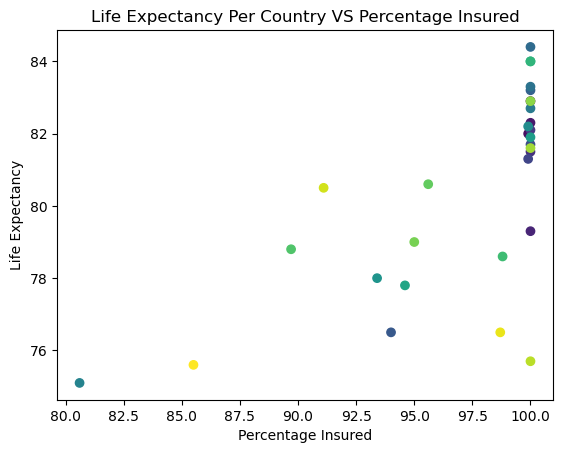

In [ ]:
health_spending_filtered_2019 = health_spending[health_spending["Year"] == 2019]

countries = health_spending_filtered_2019["Country"]
colors = np.arange(len(countries))

columns = health_spending.columns
life = columns[2]
adeath = columns[3]
infant = columns[4]
maternal = columns[5]
heart = columns[6]

life_scatter = plt.scatter(health_spending_filtered_2019["Total Percent of Population with Health Insurance"],health_spending_filtered_2019[life], c = colors, cmap = "viridis")
plt.title("Life Expectancy Per Country VS Percentage Insured")
plt.xlabel("Percentage Insured")
plt.ylabel("Life Expectancy")
life_scatter

In [ ]:


# Assuming health_spending_filtered_2019 is your DataFrame
countries = health_spending_filtered_2019["Country"]
life_expectancy = health_spending_filtered_2019["Life Expectancy (Years)"]
insurance_percentage = health_spending_filtered_2019["Total Percent of Population with Health Insurance"]
health_expenditure = health_spending_filtered_2019["Health Expenditure Per Capita, Current Prices, Current PPP"]

# Normalize life expectancy values to use RdYlGn colormap
norm = plt.Normalize(life_expectancy.min(), life_expectancy.max())
colors = plt.cm.RdYlGn(norm(life_expectancy))

# Normalize health expenditure values for marker size
size_norm = plt.Normalize(health_expenditure.min(), health_expenditure.max())
sizes = 100 * (size_norm(health_expenditure) + 0.1)  # Adjusting size range

# Create scatter plot
life_scatter = plt.scatter(
    insurance_percentage,
    life_expectancy,
    c=colors,
    s=sizes,
    alpha=0.7
)
plt.title("Life Expectancy vs Percentage of Population Insured")
plt.xlabel("Percentage of Population Insured")
plt.ylabel("Life Expectancy")

# Adding annotations for country names
for i, country in enumerate(countries):
    plt.annotate(country, (insurance_percentage.iloc[i], life_expectancy.iloc[i]), fontsize=8)

# Adding hover labels using mplcursors
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"{countries[sel.target.index]}: {life_expectancy.iloc[sel.target.index]:.2f} years"))

# Adding a colorbar for reference
cbar = plt.colorbar(life_scatter, label="Life Expectancy")
plt.show()


ModuleNotFoundError: No module named 'mplcursors'

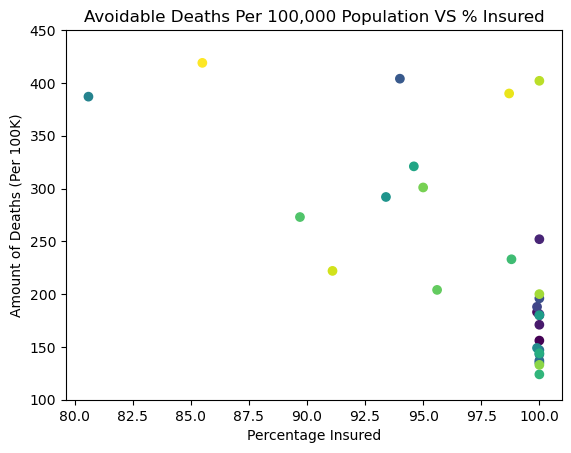

In [ ]:
#Avoidable Deaths Per 100,000 Population
a_d_scatter = plt.scatter(health_spending_filtered_2019["Total Percent of Population with Health Insurance"],health_spending_filtered_2019[adeath], c = colors)
plt.ylabel("Amount of Deaths (Per 100K)")
plt.ylim(100, 450)

plt.xlabel("Percentage Insured")

plt.title("Avoidable Deaths Per 100,000 Population VS % Insured")
a_d_scatter

Text(0.5, 1.0, 'Infant Mortality VS % Insured')

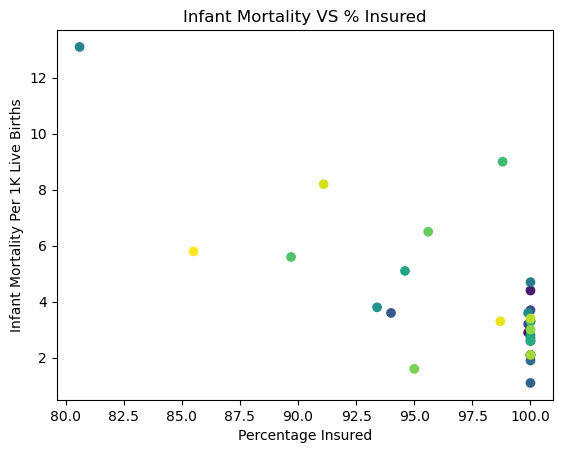

In [ ]:
infant_scatter = plt.scatter(health_spending_filtered_2019["Total Percent of Population with Health Insurance"],health_spending_filtered_2019[infant],c = colors)
plt.ylabel("Infant Mortality Per 1K Live Births")

plt.xlabel("Percentage Insured")

plt.title("Infant Mortality VS % Insured")

Text(0.5, 1.0, 'Maternal Mortality VS % Insured')

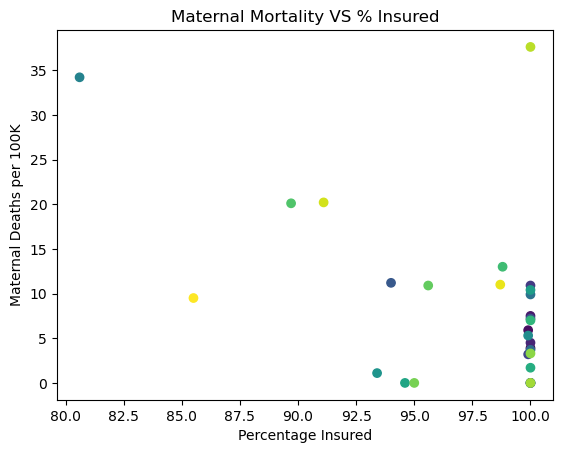

In [ ]:
maternal_scatter = plt.scatter(health_spending_filtered_2019["Total Percent of Population with Health Insurance"],health_spending_filtered_2019[maternal],c = colors)
plt.ylabel("Maternal Deaths per 100K")

plt.xlabel("Percentage Insured")
plt.title("Maternal Mortality VS % Insured")

Text(0.5, 0, 'Percentage Insured')

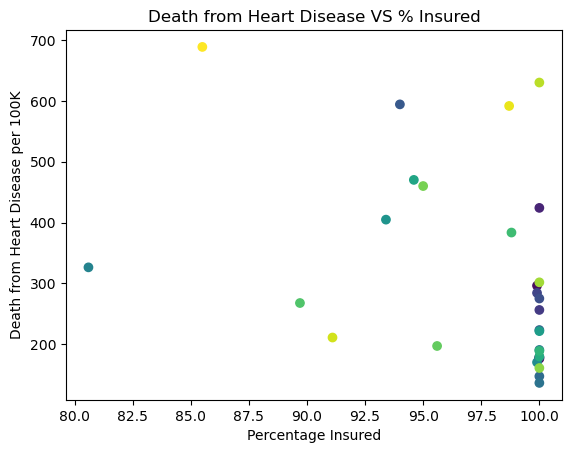

In [ ]:
heart_scatter = plt.scatter(health_spending_filtered_2019["Total Percent of Population with Health Insurance"],health_spending_filtered_2019[heart],c = colors)
plt.title("Death from Heart Disease VS % Insured")
plt.ylabel("Death from Heart Disease per 100K")

plt.xlabel("Percentage Insured")